In [1]:
#Importamos todas las librerías necesarias

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.cluster import KMeans

from scipy.stats import boxcox, probplot, norm, shapiro

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Defininmos las función que luego nos servirá para comprobar la normalidad de nuestras variables numéricas.

def comprueba_normalidad(df, return_type='axes', title='Comprobación de normalidad'):
    '''
    Esta función genera automáticamente un dataframe el shapiro test de las variables numéricas
     así como las gráficas referentes a la QQ-plot de cada variable
    '''
    fig_tot = (len(df.columns))
    fig_por_fila = 3
    tamanio_fig  = 4
    num_filas = int( np.ceil(fig_tot/fig_por_fila) )    
    plt.figure( figsize=( fig_por_fila*tamanio_fig+5, num_filas*tamanio_fig+2 ) )
    c = 0 
    shapiro_test = {}
    lambdas = {}
    for i, col in enumerate(df.columns):
        ax = plt.subplot(num_filas, fig_por_fila, i+1)
        probplot(x = df[df.columns[i]], dist=norm, plot=ax)
        plt.title(df.columns[i])
        shapiro_test[df.columns[i]] = shapiro(df[df.columns[i]])
    plt.suptitle(title)
    plt.show()
    shapiro_test = pd.DataFrame(shapiro_test, index=['Test Statistic', 'p-value']).transpose()
    return shapiro_test



In [3]:
#Importamos nuestro fichero clientes completo ya tratado
clientes_df = pd.read_csv("clientes_completo.csv", header=0, sep=";")
display(clientes_df.head(5))


,id,user_id,sequence_number,event_type,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,458138,35092.0,3,cart,Linda,Watson,lindawatson@example.net,50,F,Hokkaido,21465 Rhonda Field Suite 992,003-0030,Sapporo,Japan,4.303.853.579,1.414.478.828,Display,2022-05-22 02:33:00+00:00
1,444176,34028.0,6,cart,Kaitlyn,Neal,kaitlynneal@example.org,70,F,Hokkaido,04357 Darren Camp Suite 558,007-0890,Sapporo,Japan,4.313.656.452,1.414.374.334,Email,2020-02-20 01:20:00+00:00
2,170896,13199.0,4,cart,Sarah,Shaw,sarahshaw@example.org,16,F,SÃ£o Paulo,876 Stewart Port Apt. 445,02220-000,SÃ£o Paulo,Brasil,-2.348.476.114,-4.657.438.974,Search,2021-08-27 13:52:00+00:00
3,1147243,87818.0,3,cart,Brooke,Pittman,brookepittman@example.org,37,F,SÃ£o Paulo,981 Brandi Via,02675-031,SÃ£o Paulo,Brasil,-2.347.256.155,-4.674.656.621,Facebook,2020-05-26 07:42:00+00:00
4,604658,46234.0,3,cart,Jacqueline,Velasquez,jacquelinevelasquez@example.com,12,F,SÃ£o Paulo,5135 Anderson Flat Suite 364,02675-031,SÃ£o Paulo,Brasil,-2.347.256.155,-4.674.656.621,Search,2023-05-22 15:22:00+00:00


In [4]:
#Revisamos tipos de datos
clientes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563033 entries, 0 to 563032
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               563033 non-null  int64  
 1   user_id          563033 non-null  float64
 2   sequence_number  563033 non-null  int64  
 3   event_type       563025 non-null  object 
 4   first_name       563033 non-null  object 
 5   last_name        563033 non-null  object 
 6   email            563033 non-null  object 
 7   age              563033 non-null  int64  
 8   gender           563033 non-null  object 
 9   state            563033 non-null  object 
 10  street_address   563033 non-null  object 
 11  postal_code      563033 non-null  object 
 12  city             557760 non-null  object 
 13  country          563033 non-null  object 
 14  latitude         563033 non-null  object 
 15  longitude        563033 non-null  object 
 16  traffic_source   563033 non-null  obje

In [5]:
clientes_df.columns

Index(['id', 'user_id', 'sequence_number', 'event_type', 'first_name',
       'last_name', 'email', 'age', 'gender', 'state', 'street_address',
       'postal_code', 'city', 'country', 'latitude', 'longitude',
       'traffic_source', 'created_at'],
      dtype='object')

In [6]:
clientes_df["city"].value_counts()


Shanghai             14227
Beijing              12877
Seoul                 8367
Shenzhen              7731
Dongguan              5450
                     ...  
Selby                    1
Valley of Lagoons        1
Forbach                  1
Meckenheim               1
BaugÃ© en Anjou          1
Name: city, Length: 7549, dtype: int64

In [7]:
clientes_df["country"].value_counts()

China             195143
United States     124583
Brasil             82216
South Korea        29479
France             26309
United Kingdom     25549
Germany            23957
Spain              22708
Japan              13495
Australia          11699
Belgium             6346
Poland              1481
Colombia              49
EspaÃ±a               11
Austria                5
Deutschland            3
Name: country, dtype: int64

In [8]:
#Cambiamos el valor "EspaÃ±a" por"Spain"
clientes_df["country"]=clientes_df["country"].replace("EspaÃ±a","Spain")

In [9]:
clientes_df["country"].value_counts()

China             195143
United States     124583
Brasil             82216
South Korea        29479
France             26309
United Kingdom     25549
Germany            23957
Spain              22719
Japan              13495
Australia          11699
Belgium             6346
Poland              1481
Colombia              49
Austria                5
Deutschland            3
Name: country, dtype: int64

In [10]:
clientes_df["traffic_source"].value_counts()

Search      394408
Organic      85101
Facebook     32301
Email        28467
Display      22756
Name: traffic_source, dtype: int64

In [11]:
clientes_df["event_type"].value_counts()

cart          150377
product       148651
department    148541
purchase       77901
home           37555
Name: event_type, dtype: int64

In [12]:
clientes_df["gender"].value_counts()

F    281973
M    281060
Name: gender, dtype: int64

In [13]:
clientes_df.isnull().sum() / len(clientes_df) * 100

id                 0.000000
user_id            0.000000
sequence_number    0.000000
event_type         0.001421
first_name         0.000000
last_name          0.000000
email              0.000000
age                0.000000
gender             0.000000
state              0.000000
street_address     0.000000
postal_code        0.000000
city               0.936535
country            0.000000
latitude           0.000000
longitude          0.000000
traffic_source     0.000000
created_at         0.000000
dtype: float64

In [14]:
#llamamos Desconocido a la city sin valor en la tabla
clientes_df["city"].fillna("Desconocido",inplace=True)

In [15]:
clientes_df.isnull().sum() / len(clientes_df) * 100

id                 0.000000
user_id            0.000000
sequence_number    0.000000
event_type         0.001421
first_name         0.000000
last_name          0.000000
email              0.000000
age                0.000000
gender             0.000000
state              0.000000
street_address     0.000000
postal_code        0.000000
city               0.000000
country            0.000000
latitude           0.000000
longitude          0.000000
traffic_source     0.000000
created_at         0.000000
dtype: float64

In [16]:
#extraemos de la tabla aquellas variables que no nos interesan en este momento
clientes_df.drop(["id","first_name","last_name","email","state","latitude","street_address","longitude","postal_code","city","created_at"], axis=1, inplace=True)

In [17]:
#Comprobamos con las que nos hemos quedado
display(clientes_df.head(1))

,user_id,sequence_number,event_type,age,gender,country,traffic_source
0,35092.0,3,cart,50,F,Japan,Display


In [20]:
clientes_df["buyer"]=np.where(clientes_df["event_type"].str.contains("purchase"),1,0)

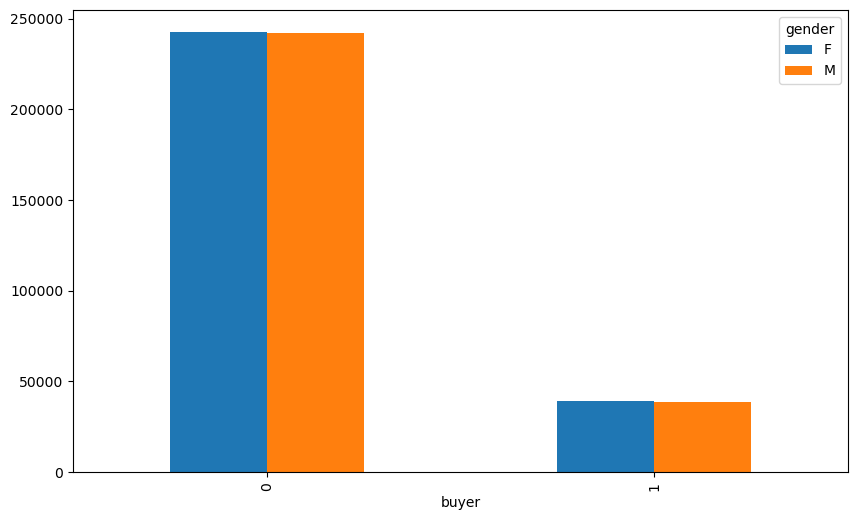

In [21]:
pd.crosstab(clientes_df.buyer, clientes_df.gender).plot(kind="bar",figsize=(10,6))
plt.show()

In [22]:
pd.crosstab(clientes_df.buyer, clientes_df.gender, normalize=True)


gender,F,M
buyer,,
0,0.431138,0.430488
1,0.069673,0.068701


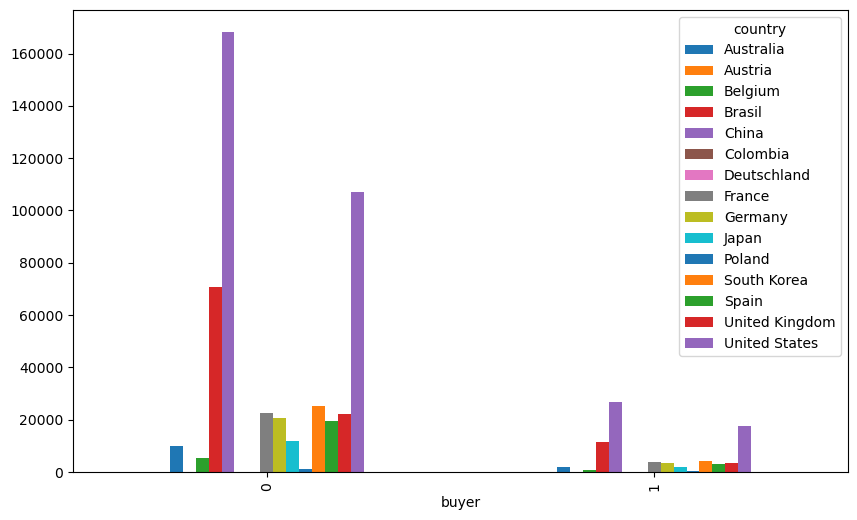

In [23]:
pd.crosstab(clientes_df.buyer, clientes_df.country).plot(kind="bar",figsize=(10,6))
plt.show()

In [24]:
pd.crosstab(clientes_df.buyer, clientes_df.country, normalize=True)


country,Australia,Austria,Belgium,Brasil,China,Colombia,Deutschland,France,Germany,Japan,Poland,South Korea,Spain,United Kingdom,United States
buyer,,,,,,,,,,,,,,,
0,0.017825,0.000007,0.009733,0.125781,0.298927,0.000076,0.000004,0.040110,0.03673,0.020786,0.002243,0.045004,0.034842,0.039186,0.190373
1,0.002954,0.000002,0.001538,0.020242,0.047665,0.000011,0.000002,0.006618,0.00582,0.003183,0.000387,0.007353,0.005509,0.006191,0.030899


In [25]:
clientes_df.head()

,user_id,sequence_number,event_type,age,gender,country,traffic_source,buyer
0,35092.0,3,cart,50,F,Japan,Display,0
1,34028.0,6,cart,70,F,Japan,Email,0
2,13199.0,4,cart,16,F,Brasil,Search,0
3,87818.0,3,cart,37,F,Brasil,Facebook,0
4,46234.0,3,cart,12,F,Brasil,Search,0


In [26]:
#definimos las variables numéricas
numeric = clientes_df.select_dtypes(exclude="object")
numeric.drop(["buyer"], axis = 1, inplace = True)
var_numericas = numeric.columns
var_numericas

Index(['user_id', 'sequence_number', 'age'], dtype='object')

In [27]:
#comprobamos su normalización con la función definida al comienzo
from scipy.stats import shapiro

for columna_numerica  in var_numericas:
    # Aplicamos shapiro
    stat, p = shapiro(clientes_df[columna_numerica])
    
    print('Valor de test=%.3f, p-value=%.3f' % (stat, p))
    # Interpretación de resultados
    alpha = 0.05
    if p > alpha:
        print('La variable ',columna_numerica, ' proviene de una distribución normal (no rechazamos H0) \n')
    else:
        print('La variable ',columna_numerica, ' no proviene de una distribución normal (rechazamos H0), por lo tanto H1 \n')

Valor de test=0.955, p-value=0.000
La variable  user_id  no proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.909, p-value=0.000
La variable  sequence_number  no proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.954, p-value=0.000
La variable  age  no proviene de una distribución normal (rechazamos H0), por lo tanto H1 



In [28]:
#Normalizamos las 3 variables con sklearn
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()

clientes_df[var_numericas] = sc.fit_transform(clientes_df[var_numericas])

In [30]:
clientes_df

,user_id,sequence_number,event_type,age,gender,country,traffic_source,buyer
0,-0.515695,-0.547524,cart,0.524620,F,Japan,Display,0
1,-0.552616,0.452614,cart,1.698963,F,Japan,Email,0
2,-1.275380,-0.214145,cart,-1.471763,F,Brasil,Search,0
3,1.313892,-0.547524,cart,-0.238703,F,Brasil,Facebook,0
4,-0.129069,-0.547524,cart,-1.706631,F,Brasil,Search,0
...,...,...,...,...,...,...,...,...
563028,-1.136962,0.452614,cart,-1.178177,F,China,Search,0
563029,1.454669,0.452614,cart,-1.706631,F,Germany,Facebook,0
563030,-0.386438,2.452890,cart,-1.002025,M,China,Search,0
563031,-1.228952,-0.214145,cart,-1.002025,F,South Korea,Search,0


In [31]:
clientes_df.columns

Index(['user_id', 'sequence_number', 'event_type', 'age', 'gender', 'country',
       'traffic_source', 'buyer'],
      dtype='object')

In [32]:
clientes_df = pd.get_dummies(clientes_df, columns=['gender', "event_type" ,'country', 'traffic_source'])

In [33]:
clientes_df.columns

Index(['user_id', 'sequence_number', 'age', 'buyer', 'gender_F', 'gender_M',
       'event_type_cart', 'event_type_department', 'event_type_home',
       'event_type_product', 'event_type_purchase', 'country_Australia',
       'country_Austria', 'country_Belgium', 'country_Brasil', 'country_China',
       'country_Colombia', 'country_Deutschland', 'country_France',
       'country_Germany', 'country_Japan', 'country_Poland',
       'country_South Korea', 'country_Spain', 'country_United Kingdom',
       'country_United States', 'traffic_source_Display',
       'traffic_source_Email', 'traffic_source_Facebook',
       'traffic_source_Organic', 'traffic_source_Search'],
      dtype='object')

In [34]:
clientes_df

,user_id,sequence_number,age,buyer,gender_F,gender_M,event_type_cart,event_type_department,event_type_home,event_type_product,...,country_Poland,country_South Korea,country_Spain,country_United Kingdom,country_United States,traffic_source_Display,traffic_source_Email,traffic_source_Facebook,traffic_source_Organic,traffic_source_Search
0,-0.515695,-0.547524,0.524620,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.552616,0.452614,1.698963,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-1.275380,-0.214145,-1.471763,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.313892,-0.547524,-0.238703,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.129069,-0.547524,-1.706631,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563028,-1.136962,0.452614,-1.178177,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
563029,1.454669,0.452614,-1.706631,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
563030,-0.386438,2.452890,-1.002025,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
563031,-1.228952,-0.214145,-1.002025,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [35]:
# Conjuntos X e Y extrayendo la variable objetivo
X = clientes_df.drop(["buyer"], axis = 1, inplace = False)
Y = clientes_df["buyer"]

In [36]:
#nos importamos Train Test Split de la librería de Sklearn
from sklearn.model_selection import train_test_split

In [37]:
#Identificamos las partes X e Y para train y test, y decidimos que el tamaño del test lo haremos sobre el 20% de los datos
#por lo que asignamos al tamaño del test 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

In [38]:
#Vamos a ver e identificar el tamaño de cada parte
print("El Tamaño de TRAIN es de")
print((X_train.shape),"filas y columnas en el eje x")
print((y_train.shape ),"filas en el eje y")
print("El Tamaño de TEST es de")
print((X_test.shape),"filas y columnas en el eje x")
print((y_test.shape),"filas en el eje y")

El Tamaño de TRAIN es de
(450426, 30) filas y columnas en el eje x
(450426,) filas en el eje y
El Tamaño de TEST es de
(112607, 30) filas y columnas en el eje x
(112607,) filas en el eje y


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [40]:
model_reg = LogisticRegression()
model_reg.fit(X_train, y_train)

y_pred_reg = model_reg.predict(X_test)

In [41]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

y_pred_tree = model_tree.predict(X_test)

In [42]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

In [43]:
model_svc = SVC()
model_svc.fit(X_train, y_train)

y_pred_svc = model_svc.predict(X_test)

In [44]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

### Extraer métrica Accuracy

In [45]:
#importamos de SKlearn la accuracy score
from sklearn.metrics import accuracy_score

In [48]:
print("El Accuracy de LogisticRegression es: ", round(accuracy_score(y_test, y_pred_reg), 8))
print("El Accuracy de DecisionTreeClassifier es: ", round(accuracy_score(y_test, y_pred_tree), 8))
print("El Accuracy de KNeighborsClassifier es: ", round(accuracy_score(y_test, y_pred_knn), 8))
print("El Accuracy de RandomForestClassifier es: ", round(accuracy_score(y_test, y_pred_rf), 8))
print("El Accuracy de SVC es: ", round(accuracy_score(y_test, y_pred_svc), 8))

El Accuracy de LogisticRegression es:  0.99999112
El Accuracy de DecisionTreeClassifier es:  0.99998224
El Accuracy de KNeighborsClassifier es:  0.99998224
El Accuracy de RandomForestClassifier es:  0.99999112
El Accuracy de SVC es:  0.99999112


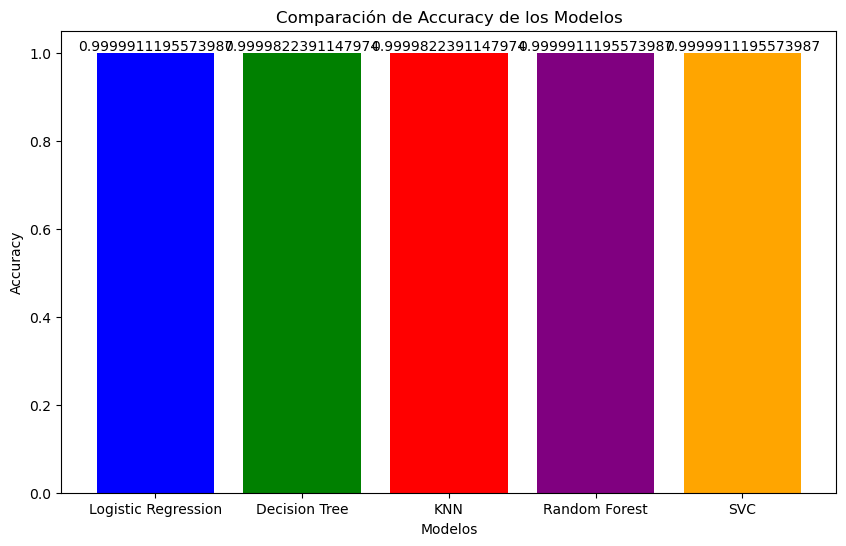

In [47]:
# Crear una lista con los nombres de los modelos y otra con los valores de accuracy. Para esto último previamente deberé asignarle un nombre a cada score del acuraccy:

accuracy_reg = accuracy_score(y_test, y_pred_reg)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

model_names = ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest', 'SVC']
accuracy_scores = [accuracy_reg, accuracy_tree, accuracy_knn, accuracy_rf, accuracy_svc]

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red', 'purple', 'orange'])

# Añadir título y etiquetas a los ejes
plt.title('Comparación de Accuracy de los Modelos')
plt.xlabel('Modelos')
plt.ylabel('Accuracy')

# Añadir los valores de accuracy encima de cada barra
for i in range(len(model_names)):
    plt.text(i, accuracy_scores[i] + 0.005, str(accuracy_scores[i]), ha='center')

# Mostrar la gráfica
plt.show()

In [ ]:
#def plot_dispersion(x, figure_name, max_k = 25):
#    inertia = []

#    for k in range(2, max_k):
#        kmeans = KMeans(n_clusters = k, n_init=10).fit(x)
#        inertia.append(kmeans.inertia_) 

#    plt.plot(range(2, max_k), inertia, 'bx-')
 #   plt.xlabel('k')
#    plt.ylabel('Dispersión')
#    plt.title(figure_name)

In [ ]:
#Comprobamos como mostraría la gráfica en caso de elegir 15klusters para ver si encontramos el codo...
#plot_dispersion(x=clientes_df, figure_name="Elbow con 15K",max_k=15)

In [ ]:
#Ahora con 10 clusters
#plot_dispersion(x=clientes_df, figure_name="Elbow con 10K",max_k=10)

In [ ]:
#Parece que el nº de klusters idoneo es 5. Entrenamos KMeans con k = 5
#model = KMeans(n_clusters=5, n_init="auto")
#model.fit(clientes_df)

In [ ]:
#predicciones=model.predict(clientes_df)

In [ ]:
#print("primeras predicciones:")
#print(predicciones[:20])

In [ ]:
clientes_df.columns

In [ ]:
display(clientes_df.head(5))